In [65]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [66]:
train = pd.read_csv('train.csv', engine='python')
test = pd.read_csv('test.csv', engine = 'python')

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [68]:
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [69]:
train = train.fillna(0)
test = test.fillna(0)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [71]:
train_ID = train['custid']
test_id = test['custid']

train.drop('custid', axis=1, inplace=True)
test.drop('custid', axis=1, inplace=True)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    5000 non-null   float64
 10  겨울_구매건수    5000 non-null   float64
 11  봄_구매건수     5000 non-null   float64
 12  여름_구매건수    5000 non-null   float64
 13  아침_구매건수    5000 non-null   float64
 14  저녁_구매건수    5000 non-null   float64
 15  점심_구매건수    5000 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [73]:
# 한글로 하면 계속 에러날거같으니까
# 그냥 죄다 영어로 바꾸자
# 나중에 어렵게하고싶지 않아.

train=train.rename(columns={'총구매액':'tot_price', '구매건수':'count', 
                         '평균구매가격':'avg_price', '평균할부개월수':'avg_install',
                         '구매브랜드종류':'brand_category', '내점일수':'visited', 
                         '수입상품_구매비율':'income_rate', '주말방문비율':'week_visited',
                         '가을_구매건수':'fall_count', '겨울_구매건수':'wint_count',
                         '봄_구매건수':'spring_count', '여름_구매건수':'summer_count',
                         '아침_구매건수':'morning_count', '저녁_구매건수':'night_count',
                         '점심_구매건수':'after_count', '주구매코너':'major'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   tot_price       5000 non-null   int64  
 2   count           5000 non-null   int64  
 3   avg_price       5000 non-null   int64  
 4   avg_install     5000 non-null   float64
 5   brand_category  5000 non-null   int64  
 6   visited         5000 non-null   int64  
 7   income_rate     5000 non-null   float64
 8   week_visited    5000 non-null   float64
 9   fall_count      5000 non-null   float64
 10  wint_count      5000 non-null   float64
 11  spring_count    5000 non-null   float64
 12  summer_count    5000 non-null   float64
 13  morning_count   5000 non-null   float64
 14  night_count     5000 non-null   float64
 15  after_count     5000 non-null   float64
 16  major           5000 non-null   object 
dtypes: float64(10), int64(6), object(

In [74]:
# 수치형으로 입력할경우 순위가 생기기떄문에 안됨
# 그래서 one-hot 인코딩으로 



train['major'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
트래디셔널캐주얼      91
니트단품          91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: major, dtype: int64

In [75]:
# major를 숫자화 한다
train['major'] = train['major'].astype('category')
train['major'] = train['major'].cat.codes
train['major'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: major, dtype: int64

In [76]:
df_corr = train.corr()
df_corr

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,wint_count,spring_count,summer_count,morning_count,night_count,after_count,major
gender,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
tot_price,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
count,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
avg_price,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
avg_install,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
brand_category,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
visited,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
income_rate,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
week_visited,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942
fall_count,0.088600,0.657523,0.896969,-0.036019,-0.018789,0.777740,0.843133,-0.183411,-0.084014,1.000000,0.729604,0.732474,0.735223,0.607713,0.572024,0.848190,-0.119888


In [77]:
pd.DataFrame(abs(train.corr()['gender']).sort_values(ascending = False))

,gender
gender,1.000000
morning_count,0.127779
summer_count,0.101900
tot_price,0.099137
after_count,0.097237
count,0.094022
fall_count,0.088600
visited,0.084255
brand_category,0.083988
spring_count,0.076116


In [78]:
## get the most important variables. 
corr = train.corr()**2
corr.gender.sort_values(ascending=False)

gender            1.000000
morning_count     0.016327
summer_count      0.010384
tot_price         0.009828
after_count       0.009455
count             0.008840
fall_count        0.007850
visited           0.007099
brand_category    0.007054
spring_count      0.005794
avg_price         0.005210
wint_count        0.004259
major             0.001542
night_count       0.000467
income_rate       0.000453
week_visited      0.000418
avg_install       0.000403
Name: gender, dtype: float64

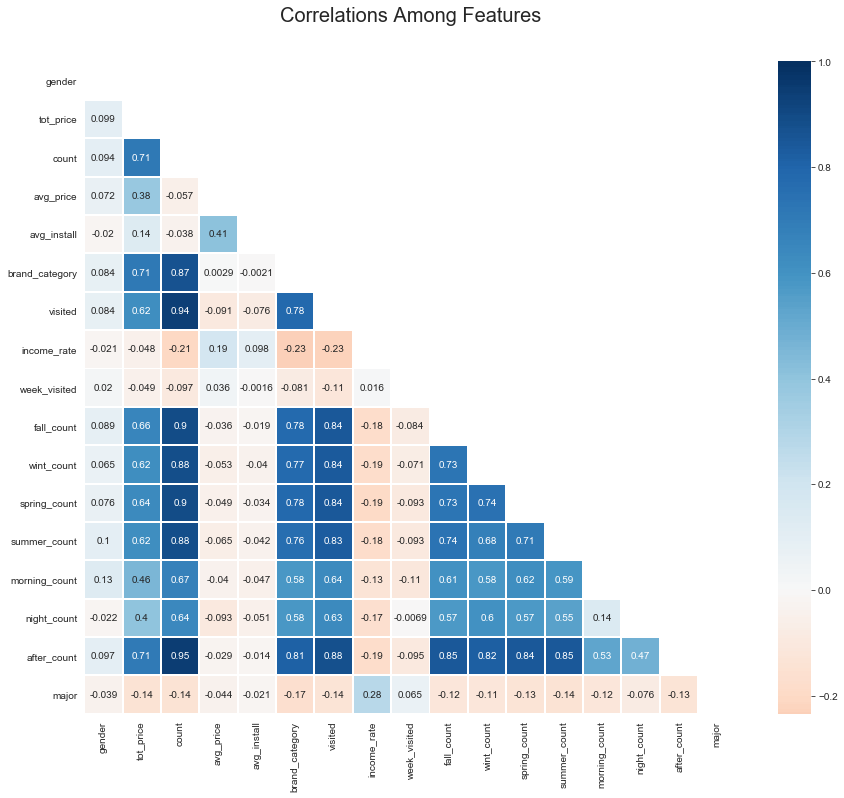

In [79]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

count and season count

tot_price and count

after_count and season count

visited and brand category

visited and count

In [132]:
#Computing T-statistics and P-value
male_mean = train[train['gender'] == 1].night_count.mean()

female_mean = train[train['gender'] == 0].night_count.mean()
print ("Male after_count mean: " + str(male_mean))
print ("female after_count mean: " + str(female_mean))

print ("The mean difference between male and female after_count rate: " + str(female_mean - male_mean))

Male after_count mean: 7.047337278106509
female after_count mean: 7.595860879563093
The mean difference between male and female after_count rate: 0.5485236014565835


In [133]:
# separating male and female dataframe. 
import random
male = train[train['gender'] == 1]
female = train[train['gender'] == 0]

## empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['after_count']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['after_count']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 25.3
Male mean sample mean: 19.59
Difference between male and female mean sample mean: -5.71


In [81]:
#feature engineering
# introduce new feature
train['tot_exported_goods'] = np.where((train['income_rate']!=0),
                                (train['income_rate']* train['tot_price']) / 100, 0)

In [82]:
#feature engineering

# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['morning_price'] = np.round(df_p['tot_price']*(df_p['morning_count'] /df_p['count'] ), 3)
    df_p['after_price'] = np.round(df_p['tot_price']*(df_p['after_count'] /df_p['count'] ), 3)
    df_p['night_price'] = np.round(df_p['tot_price']*(df_p['night_count'] /df_p['count'] ), 3)  
    df_p['spring_price']   = np.round(df_p['tot_price']*(df_p['spring_count'] /df_p['count'] ), 3) 
    df_p['summer_price'] = np.round(df_p['tot_price']*(df_p['summer_count'] /df_p['count'] ), 3) 
    df_p['fall_price'] = np.round(df_p['tot_price']*(df_p['fall_count'] /df_p['count'] ), 3)  
    df_p['wint_price'] = np.round(df_p['tot_price']*(df_p['wint_count'] /df_p['count'] ), 3)  
    df_p['visited_price'] = np.round(df_p['count'] /df_p['visited'], 3)

def dropFeatures(df_p):
    drop_cols = ['morning_count', 'after_count', 'night_count',
         'spring_count', 'summer_count', 'fall_count', 'wint_count'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(train)
dataPP = dropFeatures(train) 
dataPP[(dataPP['major']==2)].head()

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
39,0,454800,5,90960,3.0,4,4,20.0,25.0,2,90960.00,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
478,0,4712934,19,248049,2.3,10,12,10.5,33.3,2,494858.07,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
1126,1,1497200,12,124767,3.8,8,8,25.0,62.5,2,374300.00,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
1265,0,951000,12,79250,1.7,10,3,0.0,33.3,2,0.00,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
1612,0,253000,8,31625,1.0,6,7,12.5,14.3,2,31625.00,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [83]:
train

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,fall_count,...,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,...,24,181586.700,0.000,408060.000,272040.000,272040.000,0.000,0.000,408060.000,1.500
1,0,353450,9,39272,1.2,6,8,11.1,37.5,0.0,...,11,39232.950,117816.667,235633.333,0.000,157088.889,0.000,0.000,196361.111,1.125
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,...,15,317598.400,1575388.889,2363083.333,1732927.778,1890466.667,0.000,1102772.222,2678161.111,2.250
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,...,24,771852.000,0.000,701428.571,1262571.429,1052142.857,0.000,350714.286,561142.857,2.000
4,0,885000,5,177000,6.0,5,2,0.0,100.0,0.0,...,22,0.000,0.000,0.000,885000.000,885000.000,0.000,0.000,0.000,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,...,14,719983.836,573463.828,3154051.054,2939002.118,1003561.699,2365538.290,931878.720,2365538.290,2.385
4996,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,...,5,914957.400,549194.118,2562905.882,0.000,1098388.235,183064.706,732258.824,1098388.235,1.308
4997,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,...,24,2370255.210,2530803.027,3321678.973,0.000,949051.135,2056277.459,1898102.270,949051.135,1.762
4998,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,...,22,50396.346,0.000,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857


In [84]:
dataPP

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0,680100,15,45340,1.7,9,10,26.7,100.0,24,181586.700,0.000,408060.000,272040.000,272040.000,0.000,0.000,408060.000,1.500
1,0,353450,9,39272,1.2,6,8,11.1,37.5,11,39232.950,117816.667,235633.333,0.000,157088.889,0.000,0.000,196361.111,1.125
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,15,317598.400,1575388.889,2363083.333,1732927.778,1890466.667,0.000,1102772.222,2678161.111,2.250
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,24,771852.000,0.000,701428.571,1262571.429,1052142.857,0.000,350714.286,561142.857,2.000
4,0,885000,5,177000,6.0,5,2,0.0,100.0,22,0.000,0.000,0.000,885000.000,885000.000,0.000,0.000,0.000,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,6666517,93,71683,1.8,27,39,10.8,43.6,14,719983.836,573463.828,3154051.054,2939002.118,1003561.699,2365538.290,931878.720,2365538.290,2.385
4996,0,3112100,17,183065,3.6,10,13,29.4,38.5,5,914957.400,549194.118,2562905.882,0.000,1098388.235,183064.706,732258.824,1098388.235,1.308
4997,1,5852482,37,158175,2.6,14,21,40.5,19.0,24,2370255.210,2530803.027,3321678.973,0.000,949051.135,2056277.459,1898102.270,949051.135,1.762
4998,1,654498,13,50346,2.5,10,7,7.7,14.3,22,50396.346,0.000,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857


In [85]:
## get the most important variables. 
corr = dataPP.corr()**2
corr.gender.sort_values(ascending=False)

gender                1.000000
morning_price         0.014550
summer_price          0.010433
tot_price             0.009828
fall_price            0.009134
after_price           0.008952
count                 0.008840
visited               0.007099
brand_category        0.007054
spring_price          0.006574
wint_price            0.005555
avg_price             0.005210
tot_exported_goods    0.004293
visited_price         0.002412
major                 0.001542
income_rate           0.000453
week_visited          0.000418
avg_install           0.000403
night_price           0.000226
Name: gender, dtype: float64

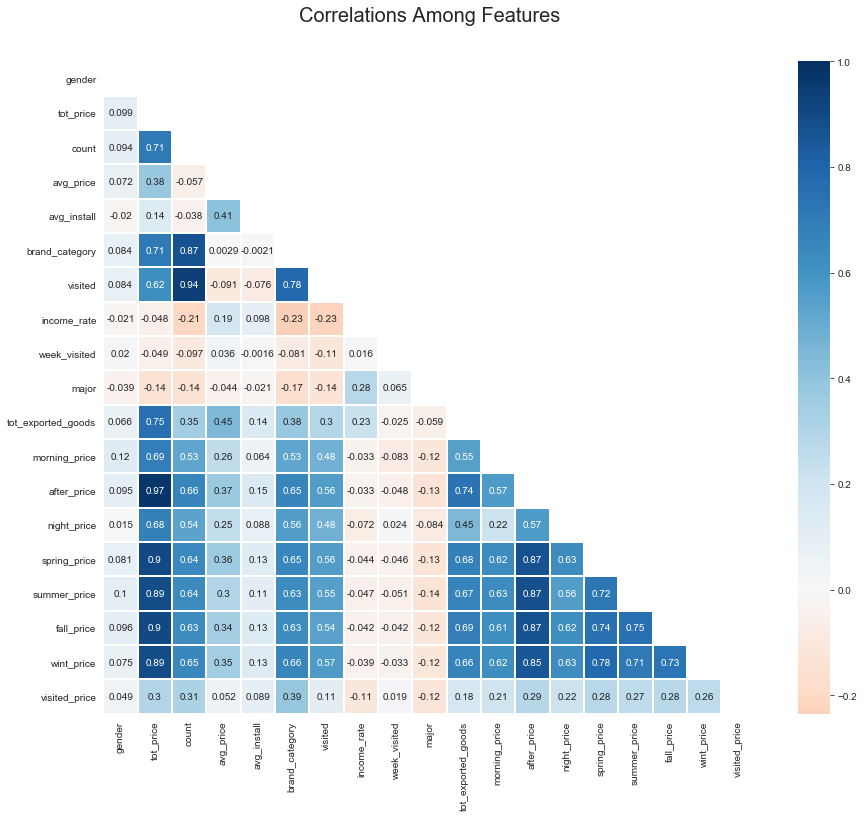

In [86]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(dataPP.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(dataPP.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [87]:
# Pre-Modeling Tasks
# separating our independent and dependent variable
X = dataPP.drop(['gender', 'avg_install','income_rate'], axis = 1)
y = dataPP["gender"]

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state=0)

In [89]:
dataPP

,gender,tot_price,count,avg_price,avg_install,brand_category,visited,income_rate,week_visited,major,tot_exported_goods,morning_price,after_price,night_price,spring_price,summer_price,fall_price,wint_price,visited_price
0,0,680100,15,45340,1.7,9,10,26.7,100.0,24,181586.700,0.000,408060.000,272040.000,272040.000,0.000,0.000,408060.000,1.500
1,0,353450,9,39272,1.2,6,8,11.1,37.5,11,39232.950,117816.667,235633.333,0.000,157088.889,0.000,0.000,196361.111,1.125
2,0,5671400,36,157539,2.8,22,16,5.6,37.5,15,317598.400,1575388.889,2363083.333,1732927.778,1890466.667,0.000,1102772.222,2678161.111,2.250
3,0,1964000,28,70143,1.4,15,14,39.3,28.6,24,771852.000,0.000,701428.571,1262571.429,1052142.857,0.000,350714.286,561142.857,2.000
4,0,885000,5,177000,6.0,5,2,0.0,100.0,22,0.000,0.000,0.000,885000.000,885000.000,0.000,0.000,0.000,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,6666517,93,71683,1.8,27,39,10.8,43.6,14,719983.836,573463.828,3154051.054,2939002.118,1003561.699,2365538.290,931878.720,2365538.290,2.385
4996,0,3112100,17,183065,3.6,10,13,29.4,38.5,5,914957.400,549194.118,2562905.882,0.000,1098388.235,183064.706,732258.824,1098388.235,1.308
4997,1,5852482,37,158175,2.6,14,21,40.5,19.0,24,2370255.210,2530803.027,3321678.973,0.000,949051.135,2056277.459,1898102.270,949051.135,1.762
4998,1,654498,13,50346,2.5,10,7,7.7,14.3,22,50396.346,0.000,553806.000,100692.000,100692.000,50346.000,302076.000,201384.000,1.857


In [90]:
# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

## transforming "train_x"
X_train = st_scale.fit_transform(X_train)
## transforming "test_x"
X_test = st_scale.transform(X_test)

## transforming "The testset"
#test = st_scale.transform(test)

In [91]:
len(X_train)

3350

In [92]:
len(X_test)

1650

In [93]:
#modeling

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

In [94]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.702


In [95]:
#modeling

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                                
                            )

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "X_test" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix`
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted female gender", "Predicted male gender"],\
            index=["female","male"] )

,Predicted female gender,Predicted male gender
female,1126,33
male,463,28


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6993939393939393

In [98]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.05702647657841141

In [99]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.45901639344262296

In [100]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      1159
           1       0.46      0.06      0.10       491

    accuracy                           0.70      1650
   macro avg       0.58      0.51      0.46      1650
weighted avg       0.63      0.70      0.61      1650



Confusion matrix, without normalization
[[1126   33]
 [ 463   28]]
Normalized confusion matrix
[[0.97 0.03]
 [0.94 0.06]]


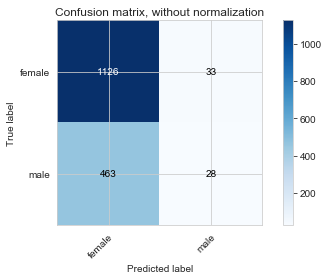

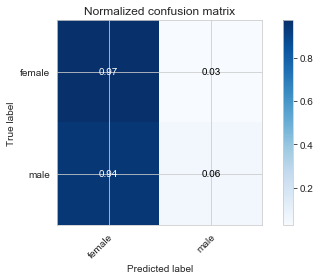

In [101]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['female','male'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

0.5736149746340075


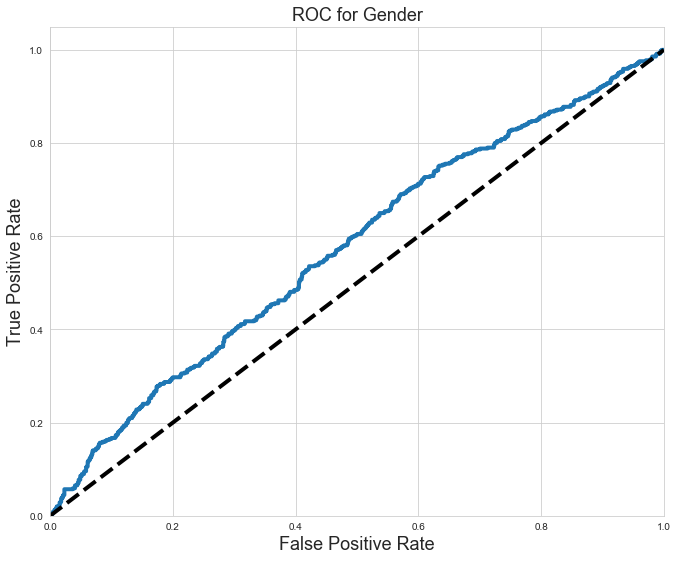

In [102]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Gender', fontsize= 18)
plt.show()

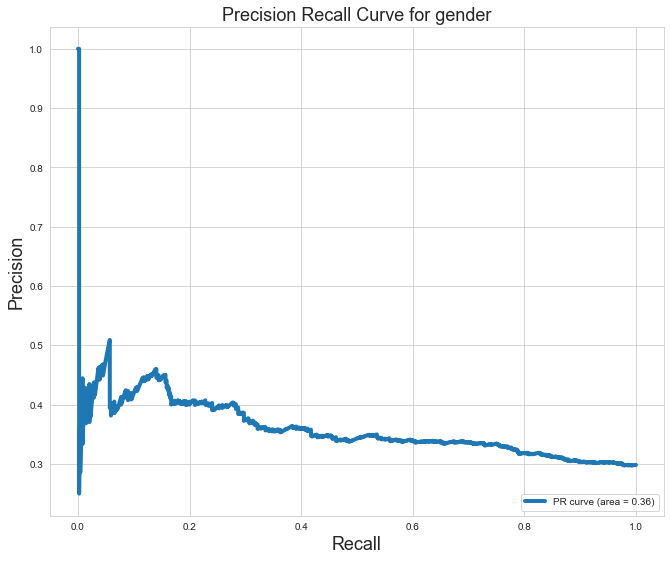

In [103]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for gender', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [104]:
# using cross validation
sc = st_scale

In [105]:
## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.7  0.69 0.69 0.69 0.7  0.7  0.69 0.7  0.69 0.69]
Mean Cross-Validation accuracy score: 0.69384


In [106]:
#Grid Search on Logistic Regression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpla value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['

In [107]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.69416
{'C': 0.2, 'penalty': 'l2'}
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [108]:
### Using the best parameters from the grid-search.
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.6932

In [109]:
#K-Nearest Neighbor classifier(KNN)
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X,y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.65 0.65 0.65 0.63 0.63 0.65 0.62 0.63 0.65 0.65]
Mean Cross-Validation accuracy score: 0.641


In [110]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X,y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.5860799999999998, 0.6664000000000001, 0.62448, 0.66992, 0.6412, 0.67384, 0.6530400000000001, 0.67712, 0.66072, 0.6802400000000001, 0.6669599999999999, 0.6806399999999999, 0.67208, 0.67904, 0.6735200000000001, 0.68328, 0.6788, 0.6856, 0.68024, 0.68712, 0.6825600000000001, 0.68776, 0.68336, 0.68664, 0.6850400000000001, 0.68888, 0.6860800000000001, 0.68904, 0.6877600000000001, 0.68912]

Mean accuracy score: 0.6728853333333333


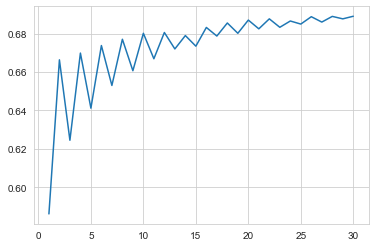

In [111]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [112]:
#Grid search on KNN classifier
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [113]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6892666666666666
{'n_neighbors': 28, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')


In [114]:
#Using best estimator from grid search using KNN.
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(X,y)

0.7004

In [115]:
#Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=False)

In [116]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.6868666666666666
{'weights': 'uniform', 'n_neighbors': 20}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


In [117]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(X,y)

0.706

In [118]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

0.664


In [119]:
#Support Vector Machines(SVM)
from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
gammas = [0.0001,0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

0.696
{'C': 0.001, 'gamma': 0.0001}
SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [121]:
# using the best found hyper paremeters to get the score. 
svm_grid = grid_search.best_estimator_
svm_grid.score(X,y)

0.6958

In [122]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
         

In [123]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto'}
0.6958
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [124]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.6958

In [125]:
conda install pydot-ng

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - pydot-ng

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [136]:
#pip install pyparsing
#pip install graphviz
#pip install pydot
#conda install graphviz

Note: you may need to restart the kernel to use updated packages.


In [171]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [172]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=column_names,  class_names = (["0" if int(i) is 1 else "1" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [138]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
after_price,1.0
tot_price,0.0
count,0.0
avg_price,0.0
brand_category,0.0
visited,0.0
week_visited,0.0
major,0.0
tot_exported_goods,0.0
morning_price,0.0


In [ ]:
pip install graphviz

In [139]:
#random forest classifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
      

In [140]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.696
{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 140}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [141]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.6958

In [142]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
morning_price,0.292857
tot_price,0.150000
summer_price,0.142857
after_price,0.107143
tot_exported_goods,0.092857
count,0.057143
avg_price,0.050000
fall_price,0.035714
wint_price,0.035714
spring_price,0.028571


In [143]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [144]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.6783333333333335
{'n_estimators': 160}
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=160,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [145]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X,y)

0.9996

In [146]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.01, 0.5],
                         'n_estimators': [100, 140, 145, 150, 160, 170, 175,
                                          180, 185]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.696
{'learning_rate': 0.01, 'n_estimators': 100}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=100, random_state=None)


In [148]:
adaBoost_grid = grid.best_estimator_
adaBoost_grid.score(X,y)

0.6958

In [149]:
#Gradient Boosting
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X, y)
y_pred = gradient_boost.predict(X_test)
gradient_accy = round(accuracy_score(y_pred, y_test), 3)
print(gradient_accy)

0.733


In [150]:
#XGBClassifier
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X, y)
y_pred = XGBClassifier.predict(X_test)
XGBClassifier_accy = round(accuracy_score(y_pred, y_test), 3)
print(XGBClassifier_accy)

0.725


In [155]:
#Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X, y)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, y_test), 3)
print(extraTree_accy)

0.993


In [156]:
#Gaussian Process Classifier
from sklearn.gaussian_process import GaussianProcessClassifier
GaussianProcessClassifier = GaussianProcessClassifier()
GaussianProcessClassifier.fit(X, y)
y_pred = GaussianProcessClassifier.predict(X_test)
gau_pro_accy = round(accuracy_score(y_pred, y_test), 3)
print(gau_pro_accy)

0.798


In [168]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
  #  ('lr_grid', logreg_grid),
  #  ('svc', svm_grid),
   # ('random_forest', rf_grid),
    ('gradient_boosting', gradient_boost),
  #  ('decision_tree_grid',dectree_grid),
   # ('knn_classifier', knn_grid),
   # ('XGB_Classifier', XGBClassifier),
   # ('bagging_classifier', bagging_grid),
   # ('adaBoost_classifier',adaBoost_grid),
    ('ExtraTrees_Classifier', ExtraTreesClassifier),
  #  ('gaussian_classifier',gaussian),
    ('gaussian_process_classifier', GaussianProcessClassifier)
],voting='soft')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(X,y)

In [169]:
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.906
